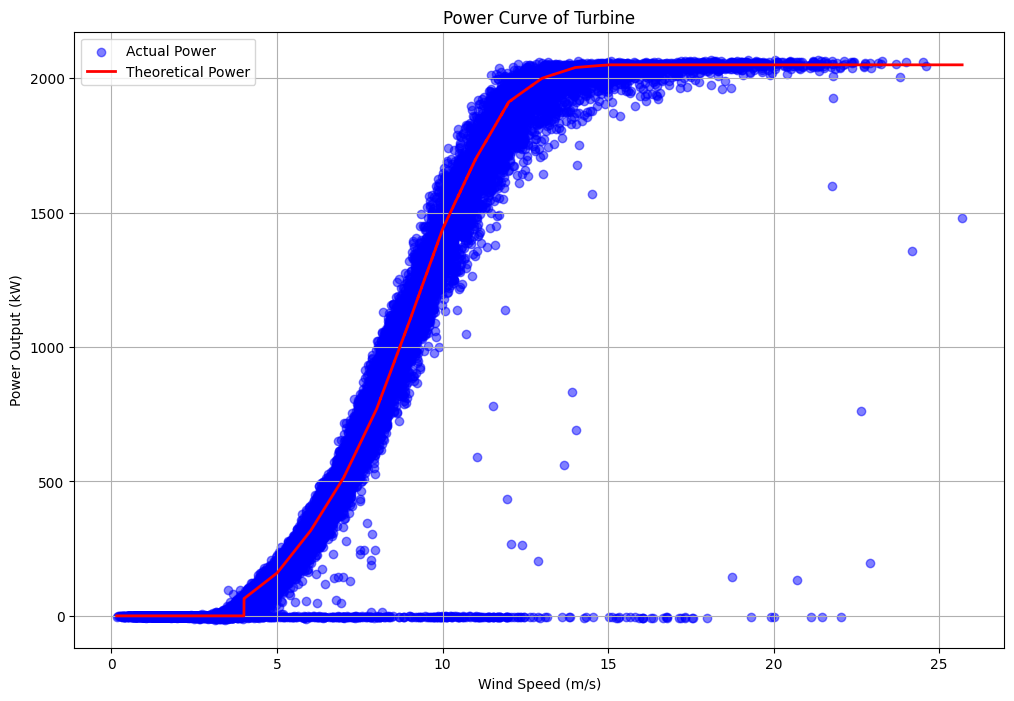

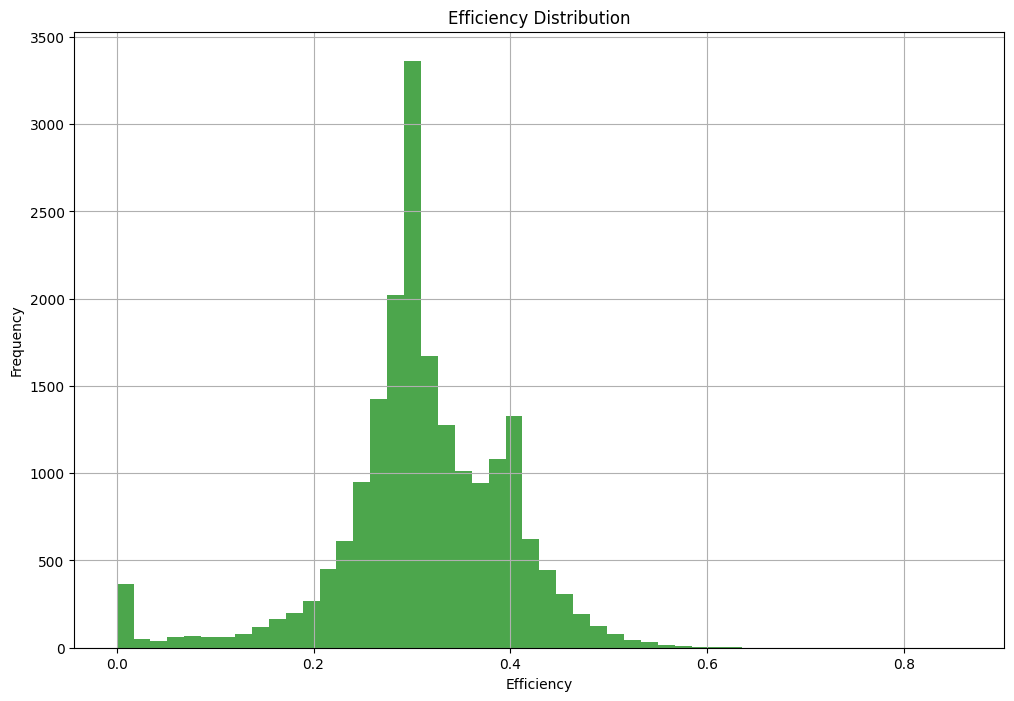

Average Capacity Factor: -inf
Average Availability: 1.00
Average Performance Index: 0.93


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If running in an environment that doesn't display plots directly, use the following:
import matplotlib
# matplotlib.use('TkAgg')  # Use a GUI backend that supports interactive plots in your environment

# Load data
file_path = '/home/herz/Desktop/wind/Turbine_Data_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv'
data = pd.read_csv(file_path, skiprows=9)

# Replace 'NaN' strings with actual NaN values and convert relevant columns to float
data.replace('NaN', np.nan, inplace=True)
cols_to_float = ['Wind speed (m/s)', 'Power (kW)', 'Energy Export (kWh)', 'Potential power default PC (kW)', 'Available Capacity for Production (kW)']
data[cols_to_float] = data[cols_to_float].astype(float)

# Calculate Capacity Factor
data['Capacity Factor'] = data['Power (kW)'] / data['Available Capacity for Production (kW)']
data['Capacity Factor'] = data['Capacity Factor'].fillna(0)  # Replace NaNs with 0 for calculations

# Calculate Availability (simple example)
availability = data['Energy Export (kWh)'].notna().mean()

# Calculate Performance Index
data['Performance Index'] = data['Power (kW)'] / data['Potential power default PC (kW)']
data['Performance Index'] = data['Performance Index'].fillna(0)  # Replace NaNs with 0 for calculations

# Plot Power Curve
plt.figure(figsize=(12, 8))
plt.scatter(data['Wind speed (m/s)'], data['Power (kW)'], color='blue', alpha=0.5, label='Actual Power')
plt.plot(data['Wind speed (m/s)'].sort_values(), data['Potential power default PC (kW)'].sort_values(), color='red', label='Theoretical Power', linewidth=2)
plt.title('Power Curve of Turbine')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Theoretical and Actual Efficiency
data['Theoretical Energy (kWh)'] = data['Potential power default PC (kW)'] * 0.5  # Assuming 0.5 hours per interval
data['Efficiency'] = data['Energy Export (kWh)'] / data['Theoretical Energy (kWh)']
data['Efficiency'] = data['Efficiency'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data.dropna(subset=['Efficiency'], inplace=True)  # Drop rows with NaN in the Efficiency column

# Plot Efficiency Distribution
plt.figure(figsize=(12, 8))
plt.hist(data['Efficiency'], bins=50, color='green', alpha=0.7)
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print calculated statistics
print(f"Average Capacity Factor: {data['Capacity Factor'].mean():.2f}")
print(f"Average Availability: {availability:.2f}")
print(f"Average Performance Index: {data['Performance Index'].mean():.2f}")
